# Plotting

## One-dimensional data (e.g. time series, vertical profiles,...)

```julia
using PyPlot
plot(x,y,format)
```

If some package cannot be loaded, then you might need to install them with `using Pkg; Pkg.add("PACKAGE")`.

In [1]:
using ImageIO, Images, VideoIO, FileIO, Printf, PyPlot

┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1342
┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1342
┌ Info: Precompiling VideoIO [d6d074c3-1acf-5d4c-9a43-ef38773959a2]
└ @ Base loading.jl:1342


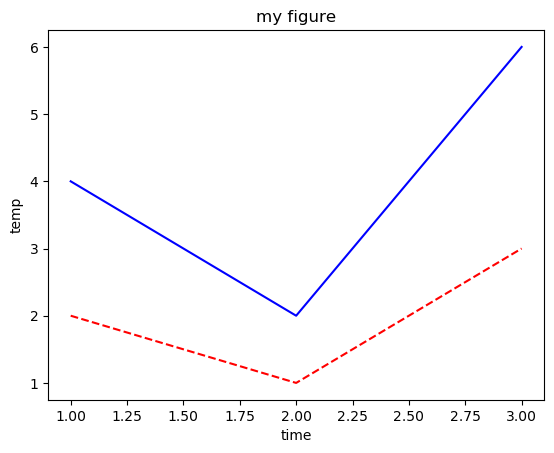

In [4]:
clf() # clear figure
x = [1,2,3]
y = [2,1,3]
using PyPlot
plot(x,y,"r--")
plot(x,2*y,"b-")
title("my figure")
xlabel("time")
ylabel("temp");

In [6]:
?polar

search: polar morpholaplace bilinear_interpolation popdisplay ExponentialBackOff




    Make a polar plot.

    call signature::

      polar(theta, r, **kwargs)

    Multiple *theta*, *r* arguments are supported, with format
    strings, as in :func:`~matplotlib.pyplot.plot`.

    

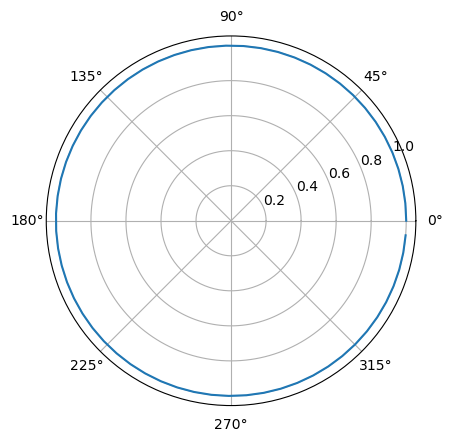

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f48ea627160>

In [10]:
theta = 0:0.1:2*pi
r = ones(size(theta))
polar(theta,r)

* Draws a line with the values in x and in y as x- (horizontal) and y-axis (vertical) respectively. With format one can specify the color (blue ("b"), red ("r"), green ("g"), ...) and style of the line (solid (-), dots (.), dotted (:), ...)

Download these data (sea level time series in the West Florida Shelf, in the 6th column) and make a plot, with a solid line in green. The date can be derived from the 5 first columns, using the command datenum. Include labels with the variable units (meters) and the date, and add a legend.

At which date did the sea level reach its maximum? 

## Two-dimensional data (e.g. horizontal sections, ...)


```julia
pcolor(x,y,v)
```

* The value within a rectangle defined by x and y is drawn by color depending on v and on the color map. 

* show the color bar

```julia
colorbar()
```

* show color bar relating values and colors

* Missing values are unfortunatetly not directly handeld by `PyPlot'.

## Annotating your graphs


* give a title to the current figure

```julia
title("my figure")
```

* give a name to the x- and y-axis

```julia
xlabel("my label"), ylabel("my label")
```

* Save the figure as a PNG file. For a EPS file use the file extension. Do not save images in JPEG as it degrades the quality of the figure.

```julia
savefig("file.png")
```

# Animations



In [16]:


data =  [sin(x)*sin(y)*cos(t) for x = 0:0.1:2π, y = 0:0.1:2π, t = 0:0.1:2π];
filenames = [@sprintf("image_frame_%04d.png",n) for n = 1:size(data,3)];

In [22]:
filenames

63-element Vector{String}:
 "image_frame_0001.png"
 "image_frame_0002.png"
 "image_frame_0003.png"
 "image_frame_0004.png"
 "image_frame_0005.png"
 "image_frame_0006.png"
 "image_frame_0007.png"
 "image_frame_0008.png"
 "image_frame_0009.png"
 "image_frame_0010.png"
 "image_frame_0011.png"
 "image_frame_0012.png"
 "image_frame_0013.png"
 ⋮
 "image_frame_0052.png"
 "image_frame_0053.png"
 "image_frame_0054.png"
 "image_frame_0055.png"
 "image_frame_0056.png"
 "image_frame_0057.png"
 "image_frame_0058.png"
 "image_frame_0059.png"
 "image_frame_0060.png"
 "image_frame_0061.png"
 "image_frame_0062.png"
 "image_frame_0063.png"

In [17]:
size(data)

(63, 63, 63)

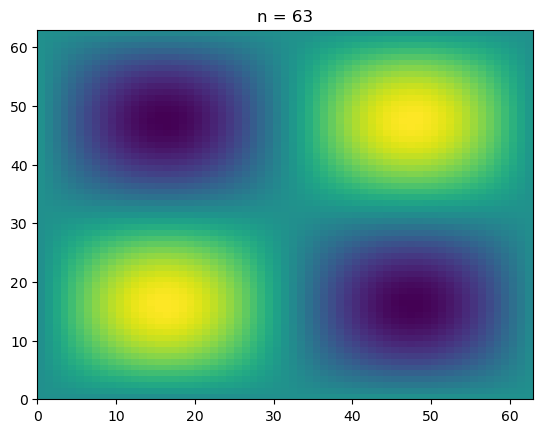

In [23]:
for n = 1:63
    clf()
    pcolor(data[:,:,n])
    title("n = $n")
    savefig(filenames[n])
end

Make the images

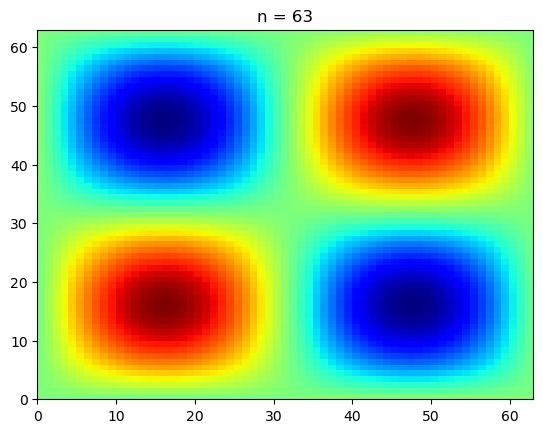

In [24]:
for n = 1:size(data,3)
  pcolor(data[:,:,n]', cmap="jet");
  title("n = $n");
  clim(-1,1);
  savefig(filenames[n])
end

Load all images as RGB (as arrays of red-green-blue color values)

In [25]:
imgstack = [RGB.(load(filename)) for filename in filenames];

┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1342


Save as a mp4 file with 10 frames per seconds

In [27]:
VideoIO.save("video.mp4",imgstack,framerate = 10);

You can now open the file `video.mp4` with your file manager.